<h1>Iris flower analysis with PCA.<h1>

3 Iris spices: setosa, virginica, versicolor.

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [35]:
url = "pca_iris.data"
#Load data frame
df = pd.read_csv(url, names=['sepal length', 'sepal width', 'petal length', 'petal width', 'target'])
#Check data
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [36]:
#Separate feature and target
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
x = df[features]
y = df[['target']]


In [37]:
#Standardizing the features (mean = 0, variance = 1)
x = StandardScaler().fit_transform(x)
#Check scale
i = 0
while i <= 5:
    print(x[i])
    i = i+1


[-0.90068117  1.03205722 -1.3412724  -1.31297673]
[-1.14301691 -0.1249576  -1.3412724  -1.31297673]
[-1.38535265  0.33784833 -1.39813811 -1.31297673]
[-1.50652052  0.10644536 -1.2844067  -1.31297673]
[-1.02184904  1.26346019 -1.3412724  -1.31297673]
[-0.53717756  1.95766909 -1.17067529 -1.05003079]


In [38]:
#PCA operation
pca = PCA(n_components=2)
principal_components = pca.fit_transform(x)
principal_df = pd.DataFrame(data = principal_components, columns=['principal component1', 'principal component2'])
#Check operation
principal_df.head()

,principal component1,principal component2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


In [39]:
#Add the target
final_df = pd.concat([principal_df, df[['target']]], axis=1)
#Check final dataframe
final_df

,principal component1,principal component2,target
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa
...,...,...,...
145,1.870522,0.382822,Iris-virginica
146,1.558492,-0.905314,Iris-virginica
147,1.520845,0.266795,Iris-virginica
148,1.376391,1.016362,Iris-virginica


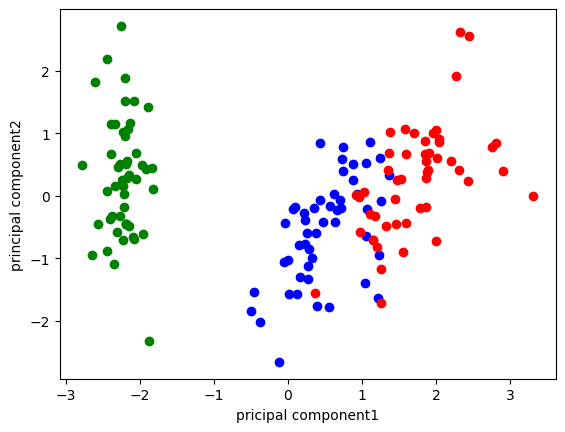

In [40]:
#Plotting final dataframe
dfsetose = final_df[df.target == 'Iris-setosa']
dfversicolor = final_df[df.target == 'Iris-versicolor']
dfvirginica = final_df[df.target == 'Iris-virginica']
plt.xlabel('pricipal component1')
plt.ylabel('principal component2')

plt.scatter(dfsetose['principal component1'], dfsetose['principal component2'], color='green')
plt.scatter(dfversicolor['principal component1'], dfversicolor['principal component2'], color='blue')
plt.scatter(dfvirginica['principal component1'], dfvirginica['principal component2'], color='red')



In [41]:
#Check the accuracy
print("Seprate accuracy: ", pca.explained_variance_ratio_)
print("Total accuracy: ", pca.explained_variance_ratio_.sum())

Seprate accuracy:  [0.72770452 0.23030523]
Total accuracy:  0.9580097536148198
